In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
minRange = np.array([0, 133, 77], np.uint8)
maxRange = np.array([235, 173, 127], np.uint8)
def preprocess (image):
    YCRImage = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    skinArea = cv2.inRange(YCRImage, minRange, maxRange)
    return cv2.resize(skinArea, (320, 120))

## Initialize Camera

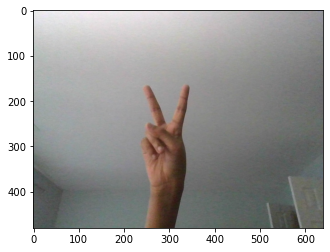

In [5]:
vc = cv2.VideoCapture(0) # Lighting is VERY important!!
rval, frame = vc.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 

## YCR_BR Conversion

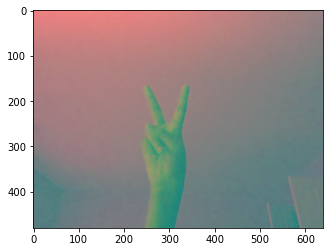

In [6]:
YCRImage = cv2.cvtColor(frame, cv2.COLOR_BGR2YCR_CB) # https://en.wikipedia.org/wiki/YCbCr
plt.imshow(YCRImage) 

In [7]:
YCRImage

array([[[239, 130, 133],
        [239, 129, 133],
        [239, 129, 133],
        ...,
        [148, 128, 131],
        [148, 129, 130],
        [144, 129, 129]],

       [[239, 129, 133],
        [237, 129, 133],
        [237, 129, 132],
        ...,
        [149, 128, 131],
        [149, 129, 130],
        [147, 129, 130]],

       [[236, 129, 131],
        [234, 129, 131],
        [235, 128, 131],
        ...,
        [147, 128, 132],
        [148, 129, 131],
        [148, 129, 131]],

       ...,

       [[ 92, 127, 128],
        [ 90, 127, 128],
        [ 89, 127, 128],
        ...,
        [ 97, 129, 124],
        [ 98, 129, 124],
        [ 97, 129, 124]],

       [[ 91, 127, 128],
        [ 88, 127, 128],
        [ 88, 127, 128],
        ...,
        [ 94, 128, 123],
        [ 96, 128, 123],
        [ 97, 128, 123]],

       [[ 94, 128, 128],
        [ 93, 128, 128],
        [ 97, 128, 128],
        ...,
        [ 93, 128, 123],
        [ 95, 128, 122],
        [ 96, 128, 122]]

## Detecting the Skin

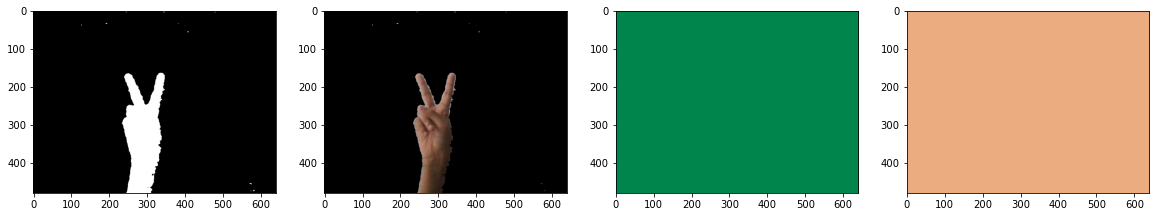

In [8]:
def show_color (color):
    return np.tile(color, (480, 640, 1))
    
minRange = np.array([0, 133, 77], np.uint8)
maxRange = np.array([235, 173, 127], np.uint8)
skinArea = cv2.inRange(YCRImage, minRange, maxRange)
masked_image = cv2.bitwise_and(frame, frame, mask=skinArea)

# plot everything
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 4, 1)
plt.imshow(skinArea, cmap='gray')
fig.add_subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB), cmap='gray')
fig.add_subplot(1, 4, 3)
plt.imshow(show_color(minRange))
fig.add_subplot(1, 4, 4)
plt.imshow(show_color(maxRange))

## Resizing image

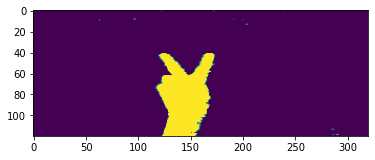

In [9]:
new_img = cv2.resize(skinArea, (320, 120))
plt.imshow(new_img)

## So, to wrap everything up

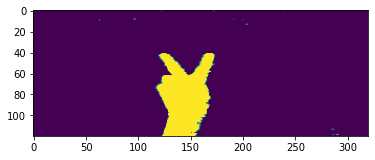

In [10]:
img = preprocess(frame)
plt.imshow(img)

In [ ]:
img